In [103]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [105]:
df.shape

(27820, 12)

In [106]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [107]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
657,Argentina,1990,female,25-34 years,76,2251000,3.38,Argentina1990,0.705,"141,352,368,715",4859,Boomers
8005,Ecuador,2010,female,5-14 years,18,1478558,1.22,Ecuador2010,0.717,"69,555,367,000",5206,Generation Z
1083,Armenia,2000,male,35-54 years,18,481100,3.74,Armenia2000,0.648,"1,911,563,665",530,Boomers
21124,Russian Federation,2004,female,25-34 years,1042,10494419,9.93,Russian Federation2004,NaN,"591,016,690,743",4312,Generation X
10523,Grenada,2001,male,5-14 years,0,12280,0.00,Grenada2001,NaN,"520,444,185",5693,Millenials


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [109]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [110]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [112]:
df.duplicated().sum()

0

In [113]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [114]:
# laver ny column så gdp for year bliver til numeric i stedet for et objekt

df['gdp_for_year'] = (
    df[' gdp_for_year ($) ']
      .str.replace(r'[^\d]', '', regex=True)
      .astype(float)
)


In [115]:
df = df.drop(columns=['country-year', ' gdp_for_year ($) ', 'generation'])


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   gdp_for_year        27820 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [117]:
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df['age_encoded'] = df['age'].cat.codes

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(2)
memory usage: 1.8+ MB


In [119]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2


In [120]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [121]:
# 2. Build a mapping dict (alphabetical order here, but you can choose any)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# 3. Apply it
df['country_numeric'] = df['country'].map(country_map)

# 4. (Optional) inspect your mapping
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [122]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),gdp_for_year,age_encoded,sex_numeric,country_numeric
0,Albania,1987,male,15-24 years,21,312900,6.71,796,2.156625e+09,1,1,1
1,Albania,1987,male,35-54 years,16,308000,5.19,796,2.156625e+09,3,1,1
2,Albania,1987,female,15-24 years,14,289700,4.83,796,2.156625e+09,1,2,1
3,Albania,1987,male,75+ years,1,21800,4.59,796,2.156625e+09,5,1,1
4,Albania,1987,male,25-34 years,9,274300,3.28,796,2.156625e+09,2,1,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
 10  sex_numeric         27820 non-null  int64   
 11  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 2.2+ MB


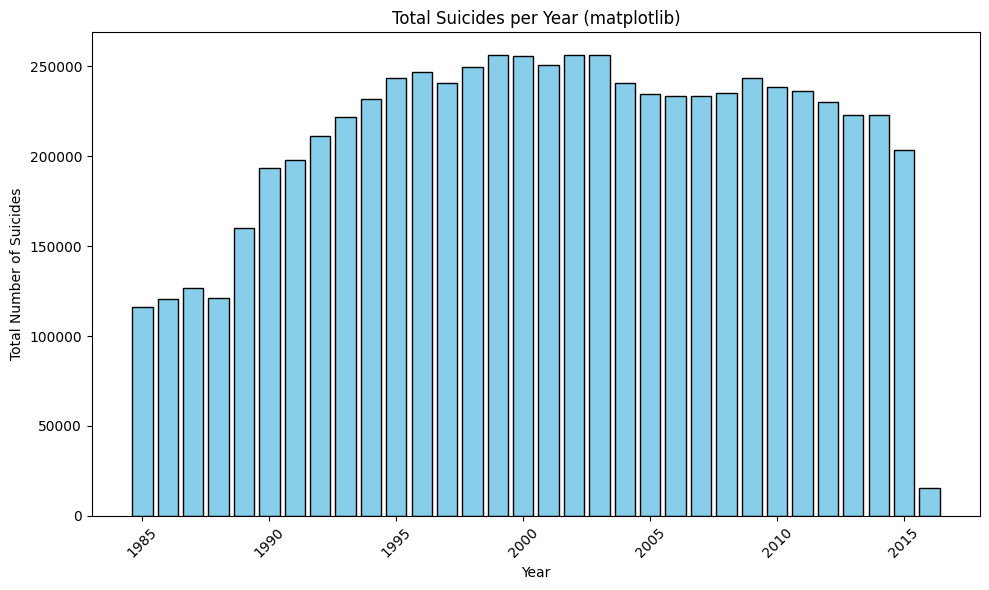

In [124]:
# 2. Aggregate total suicides per year
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# 3a. Plot with matplotlib
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
# Fjern alle rows i 2016, da dataen fra det år er minimalt
df = df[df['year'] != 2016]

# Tjek at den er væk
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


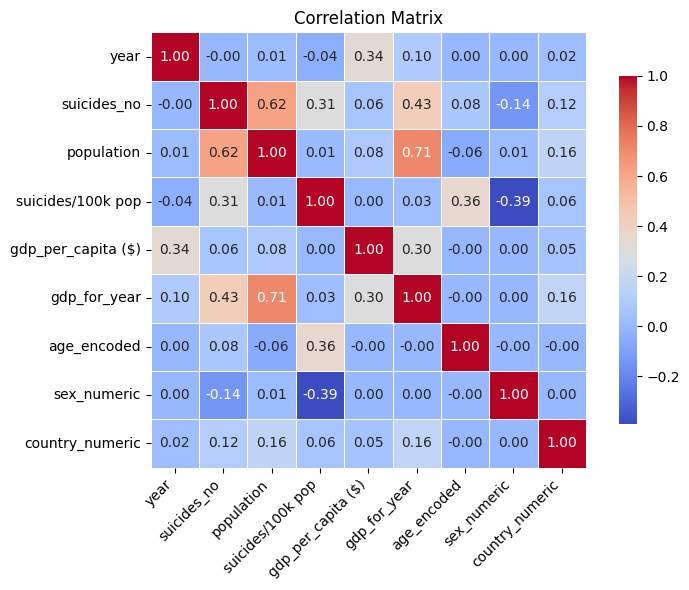

In [126]:
# 6. Compute correlation matrix on all numeric columns
corr = df.corr(numeric_only=True)

# 7. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

   age_encoded  suicides/100k pop          age
0            0            2858.39   5-14 years
1            1           41292.61  15-24 years
2            2           56239.60  25-34 years
3            3           68960.47  35-54 years
4            4           74513.18  55-74 years
5            5          110532.19    75+ years


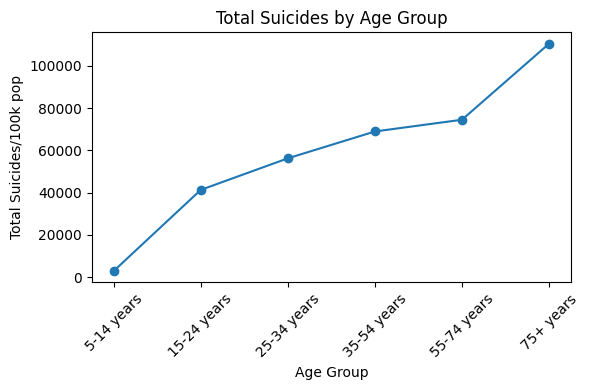

In [127]:
# Age encoded gav ikke et helt forventet resultat, så vi laver et nyt plot for at se den rigtige korrelation
age_totals = df.groupby('age_encoded', as_index=False)['suicides/100k pop'].sum()

# Map back to labels for plotting
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

print(age_totals)

# Plot the relationship
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides/100k pop'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Total Suicides/100k pop')
plt.title('Total Suicides by Age Group')
plt.tight_layout()
plt.show()

   sex_numeric  suicides/100k pop     sex
0            1          279767.16    male
1            2           74629.28  female


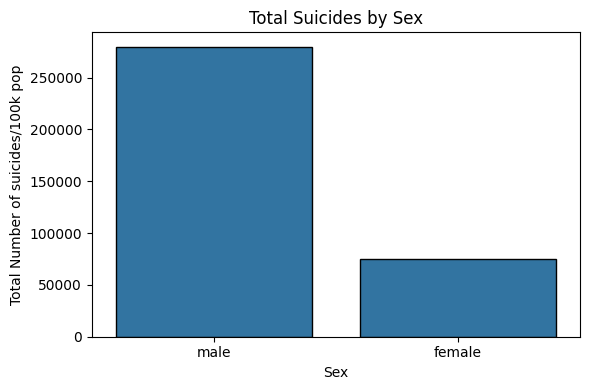

In [128]:
# 1. Sørg for at sex_numeric findes
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Aggrér total suicider per køn
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides/100k pop'].sum()

# 3. Map tal tilbage til labels
sex_map = {1: 'male', 2: 'female'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

print(sex_totals)


plt.figure(figsize=(6,4))
sns.barplot(data=sex_totals, x='sex', y='suicides/100k pop', edgecolor='black')
plt.xlabel('Sex')
plt.ylabel('Total Number of suicides/100k pop')
plt.title('Total Suicides by Sex')
plt.tight_layout()
plt.show()


## Cluster

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [146]:
# K means
# Drop 'year' because it’s just an index that would dominate distances and hide the true feature patterns


X = df.select_dtypes(include=[np.number])
X = X.drop(columns=['year'])

print("Using these numeric features:", X.columns.tolist())

Using these numeric features: ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'gdp_for_year', 'age_encoded', 'sex_numeric', 'country_numeric']


In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
# Elbow method to choose k
# Inertia just means “how far, in total, all points are from their group center.”

# Elbow method is simply “plot that total distance vs. number of groups, find where adding more groups stops helping much.”
inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42) #Training K-Means cluster model
    km.fit(X) # Use the model on our data
    inertias.append(km.inertia_) # Save the data

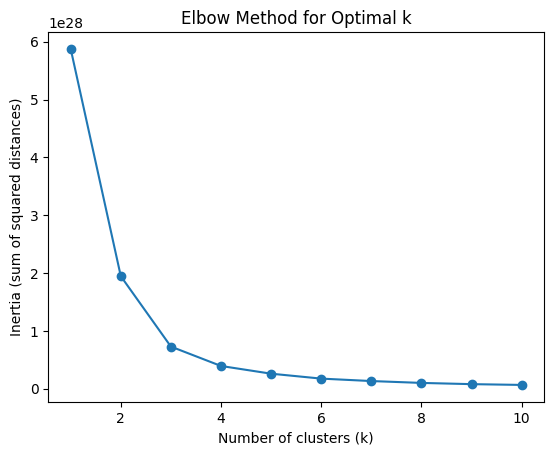

In [133]:
# Plot inertia vs. k
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [134]:
# 7. Pick your k (e.g. where the “elbow” appears; say k=3) and fit KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

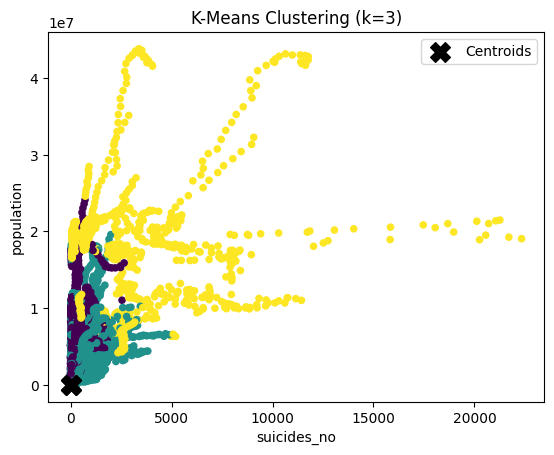

In [135]:
# 9. Visualize clusters on the first two numeric features
feat1, feat2 = X.columns[:2]
plt.figure()
plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.legend()
plt.show()

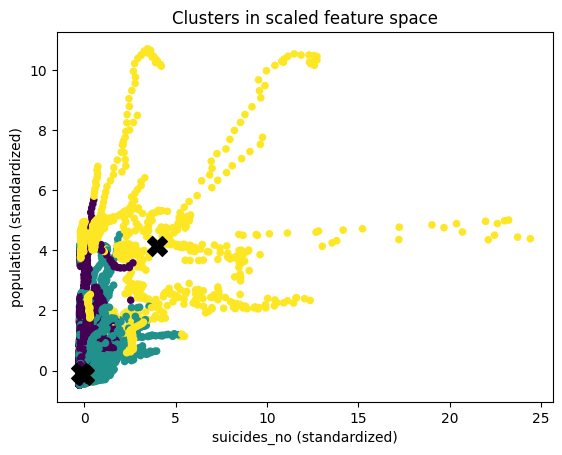

In [136]:
# After scaling:
X2 = X_scaled  # standardized matrix
cent2 = centroids  # in same space

plt.scatter(X2[:,0], X2[:,1], c=labels, s=20)
plt.scatter(cent2[:,0], cent2[:,1], marker='X', s=200, c='black')
plt.xlabel(f"{feat1} (standardized)")
plt.ylabel(f"{feat2} (standardized)")
plt.title("Clusters in scaled feature space")
plt.show()


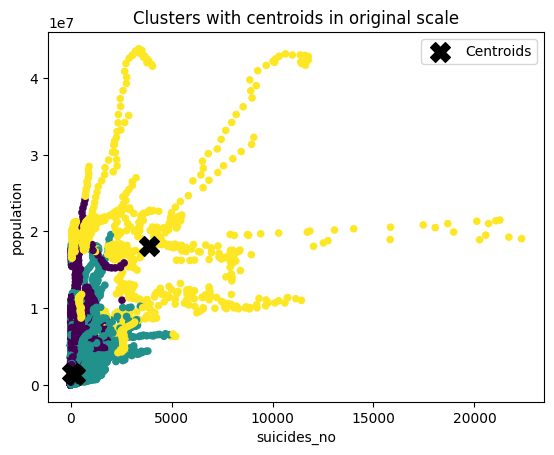

In [137]:
# Assuming you used StandardScaler() as `scaler`:
raw_centroids = scaler.inverse_transform(centroids)

plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(raw_centroids[:,0], raw_centroids[:,1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Clusters with centroids in original scale")
plt.legend()
plt.show()


In [138]:
# 10. Evaluate your clustering with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=3: -0.002


## Cluster Retry

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [175]:
url = "https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv"
df = pd.read_csv(url)

In [176]:
# Check the first 5 rows
print(df.head())

# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicates: {df.duplicated().sum()}")

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [177]:
# Drop columns with high missing values (example: if a column has >50% missing)
df = df.dropna(thresh=0.5*len(df), axis=1)

# Impute numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Impute categorical columns with mode (if any)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [178]:
# Identify categorical columns (e.g., 'country', 'sex', 'generation')
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

In [179]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [170]:
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)

In [171]:
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Proceed with clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

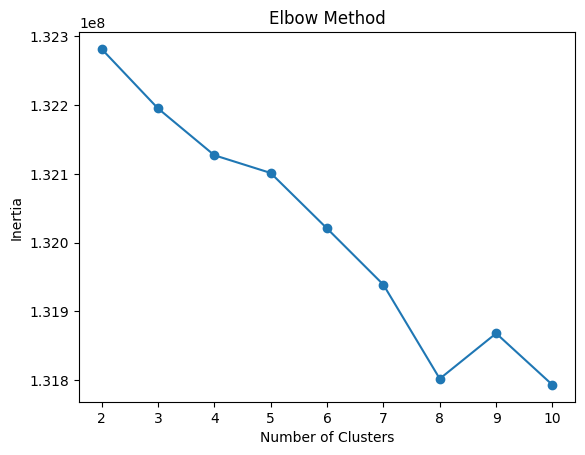

In [172]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

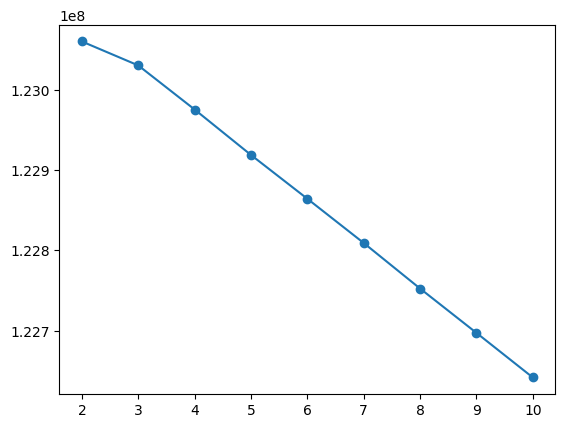

In [180]:
# After cleaning and imputation:
# Frequency encode 'country' and drop it
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)
df = df.drop('country', axis=1)

# One-hot encode remaining categorical columns (e.g., 'sex', 'generation')
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
pca = PCA(n_components=0.95)
scaled_pca = pca.fit_transform(scaled_data)

# Elbow Method on PCA-transformed data
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.show()